In [280]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression

In [334]:
df = yf.download('^GSPC',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [335]:
df['ret'] = df.Close.pct_change()

In [346]:
df['intraret'] = df.Close / df.Open - 1

In [344]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,direction,test
Date,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,0,1132.660034
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,1,1135.709961
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,1,1136.270020
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,1,1140.520020
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,1,1145.959961
...,...,...,...,...,...,...,...,...,...
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000,0.003073,1,3977.189941
2023-02-28,3977.189941,3997.500000,3968.979980,3970.149902,3970.149902,5043400000,-0.003036,0,3963.340088
2023-03-01,3963.340088,3971.729980,3939.050049,3951.389893,3951.389893,4249480000,-0.004725,0,3938.679932


In [340]:
df.ret

Date
2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
                ...   
2023-02-27    0.003073
2023-02-28   -0.003036
2023-03-01   -0.004725
2023-03-02    0.007582
2023-03-03    0.016148
Name: ret, Length: 3314, dtype: float64

In [348]:
def lagit(df, lags):
    for i in range(1,lags + 1):
        df['Lag_'+str(i)] = df['ret'].shift(i)
    return ['Lag_'+str(i) for i in range(1,lags+1)]

In [349]:
df['direction'] = np.where(df.ret > 0, 1,0)

In [350]:
df.direction.value_counts()

1    1796
0    1518
Name: direction, dtype: int64

In [351]:
features = lagit(df,3)

In [352]:
df.dropna(inplace=True)

In [353]:
X = df[features]

In [354]:
y = df['direction']

In [355]:
model = LogisticRegression(class_weight='balanced')

In [356]:
model.fit(X,y)

LogisticRegression(class_weight='balanced')

In [357]:
df['prediction_LR'] = model.predict(X)

In [358]:
df['prediction_LR'].value_counts()

0    1704
1    1605
Name: prediction_LR, dtype: int64

In [359]:
df['strat'] = df['prediction_LR'] * df.intraret

In [360]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,direction,test,intraret,Lag_1,Lag_2,Lag_3,prediction_LR,strat
Date,,,,,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,1,1145.959961,0.003910,0.004001,0.000546,0.003116,0,0.000000
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,1,1143.810059,0.000890,0.002882,0.004001,0.000546,0,0.000000
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0,1137.310059,-0.006636,0.001747,0.002882,0.004001,0,-0.000000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,1,1145.680054,0.007359,-0.009381,0.001747,0.002882,1,0.007359
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,1,1147.719971,0.002426,0.008326,-0.009381,0.001747,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000,-0.010538,0,3992.360107,-0.000805,0.005329,-0.001574,-0.020041,1,-0.000805
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000,0.003073,1,3977.189941,-0.002535,-0.010538,0.005329,-0.001574,1,-0.002535
2023-02-28,3977.189941,3997.500000,3968.979980,3970.149902,3970.149902,5043400000,-0.003036,0,3963.340088,-0.001770,0.003073,-0.010538,0.005329,0,-0.000000


<AxesSubplot:xlabel='Date'>

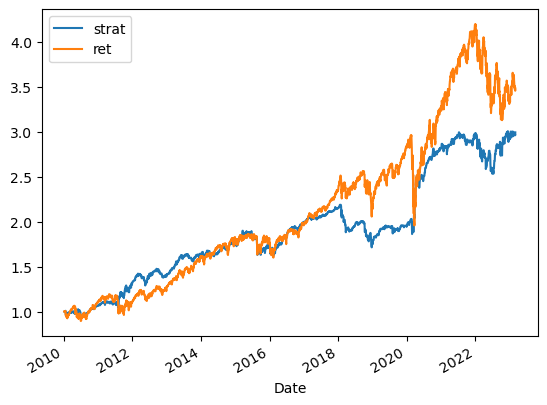

In [361]:
(df[['strat','ret']] + 1).cumprod().plot()

In [362]:
(df[['strat','ret']] + 1).cumprod()

,strat,ret
Date,,
2010-01-08,1.000000,1.002882
2010-01-11,1.000000,1.004634
2010-01-12,1.000000,0.995209
2010-01-13,1.007359,1.003495
2010-01-14,1.007359,1.005930
...,...,...
2023-02-24,2.981598,3.477336
2023-02-27,2.974040,3.488022
2023-02-28,2.974040,3.477433


In [363]:
from sklearn.model_selection import train_test_split

In [364]:
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.3,
   shuffle=False,
)

In [365]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [366]:
X_test['prediction_LR'] = model.predict(X_test)

In [372]:
X_test['intraret'] = df.intraret[X_test.index[0]:]

In [373]:
X_test['strat'] = X_test['prediction_LR'] * X_test.intraret

<AxesSubplot:xlabel='Date'>

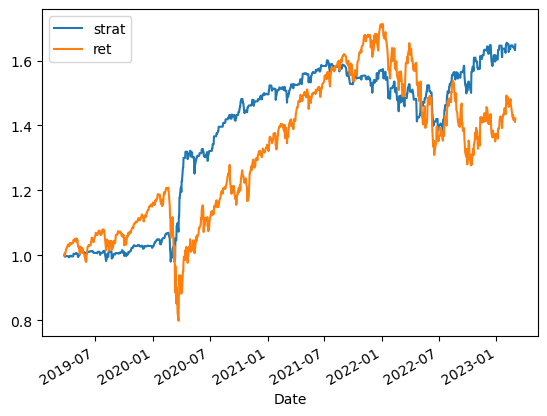

In [374]:
(X_test[['strat','ret']] + 1).cumprod().plot()

In [375]:
(X_test.tail(50)[['strat','ret']] + 1).cumprod()

,strat,ret
Date,,
2022-12-19,0.990625,0.990992
2022-12-20,0.993524,0.992020
2022-12-21,1.003602,1.006770
2022-12-22,1.003602,0.992220
2022-12-23,1.011418,0.998043
2022-12-27,1.011418,0.994001
2022-12-28,0.999179,0.982053
2022-12-29,1.010687,0.999200
2022-12-30,1.010687,0.996662
